### 1) Pick a dataset.

I'm using The Blood Transfusion Service Center Dataset from [drivendata.org](https://www.drivendata.org/competitions/2/data/), which was originally donated to the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center) by Professor I-Cheng Yeh. This data describes blood donations given at a mobile donation vehicle in Taiwan for a period ending in March 2007.

For purposes of data exploration, I will use the training set provided by drivendata.

In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as stats

%matplotlib inline

In [61]:
data = pd.read_csv('data/donations_train.csv')
data.columns = ['donorID',
                'months_since_last_donation',
                'number_of_donations',
                'total_ccs_donated',
                'months_since_first_donation',
                'donated_in_march_2007']
data = data.set_index('donorID')
data.head()

,months_since_last_donation,number_of_donations,total_ccs_donated,months_since_first_donation,donated_in_march_2007
donorID,,,,,
619,2,50,12500,98,1
664,0,13,3250,28,1
441,1,16,4000,35,1
160,2,20,5000,45,1
358,1,24,6000,77,0


### 2) Ask the following questions:

#### 1. Can you count something interesting?

In [63]:
total_donors = len(data)
total_donations = sum(data.number_of_donations)
total_ccs_donated = sum(data.total_ccs_donated)

print("      Total donors: {0:,} \n   Total donations: {1:,} \nTotal cc's donated: {2:,}".format(total_donors,
                                                                                                 total_donations,
                                                                                                 total_ccs_donated))

      Total donors: 576 
   Total donations: 3,126 
Total cc's donated: 781,500


#### 2. Can you find some trends?

In [68]:
data.sort_values(by='total_ccs_donated', ascending=False).head(10)

,months_since_last_donation,number_of_donations,total_ccs_donated,months_since_first_donation,donated_in_march_2007
donorID,,,,,
619,2,50,12500,98,1
736,5,46,11500,98,1
149,2,44,11000,98,0
39,2,43,10750,86,1
451,23,38,9500,98,0
157,4,33,8250,98,1
564,11,24,6000,64,0
358,1,24,6000,77,0
649,11,22,5500,98,0


In [69]:
data.sort_values(by='months_since_first_donation', ascending=False).head(10)

,months_since_last_donation,number_of_donations,total_ccs_donated,months_since_first_donation,donated_in_march_2007
donorID,,,,,
619,2,50,12500,98,1
149,2,44,11000,98,0
157,4,33,8250,98,1
649,11,22,5500,98,0
200,4,16,4000,98,1
171,14,16,4000,98,0
736,5,46,11500,98,1
451,23,38,9500,98,0
7,4,11,2750,95,0


In [82]:
data.sort_values(by='months_since_first_donation', ascending=True).head(10)

,months_since_last_donation,number_of_donations,total_ccs_donated,months_since_first_donation,donated_in_march_2007
donorID,,,,,
211,2,1,250,2,0
293,2,1,250,2,1
247,2,1,250,2,1
550,2,1,250,2,1
275,2,1,250,2,0
692,2,1,250,2,0
456,2,1,250,2,0
587,2,1,250,2,0
341,2,1,250,2,0


In [70]:
data.sort_values(by='months_since_last_donation', ascending=False).head(10)

,months_since_last_donation,number_of_donations,total_ccs_donated,months_since_first_donation,donated_in_march_2007
donorID,,,,,
350,74,1,250,74,0
74,72,1,250,72,0
541,39,1,250,39,0
673,35,3,750,64,0
281,26,5,1250,49,1
183,25,6,1500,50,0
378,23,2,500,23,0
117,23,1,250,23,0
325,23,15,3750,57,0


In [71]:
data.sort_values(by='months_since_last_donation', ascending=True).head(10)

,months_since_last_donation,number_of_donations,total_ccs_donated,months_since_first_donation,donated_in_march_2007
donorID,,,,,
436,0,3,750,4,0
214,0,2,500,4,0
676,0,8,2000,59,0
664,0,13,3250,28,1
358,1,24,6000,77,0
607,1,9,2250,51,0
182,1,7,1750,57,0
164,1,12,3000,35,0
106,1,14,3500,95,0


In [95]:
one_time_donors = data[data.number_of_donations == 1]
print('{0} donors have only given once.'.format(len(one_time_donors)))

118 donors have only given once.


#### 3. Can you make a bar plot or a histogram?

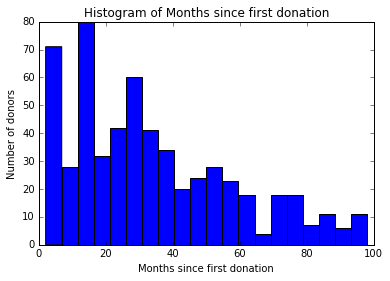

In [81]:
plt.hist(data.months_since_first_donation, bins=20)
plt.xlabel("Months since first donation")
plt.ylabel("Number of donors")
plt.title("Histogram of Months since first donation")

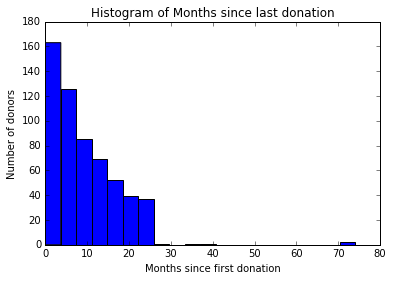

In [89]:
plt.hist(data.months_since_last_donation, bins=20)
plt.xlabel("Months since first donation")
plt.ylabel("Number of donors")
plt.title("Histogram of Months since last donation")

#### 4. Can you compare two related quantities?

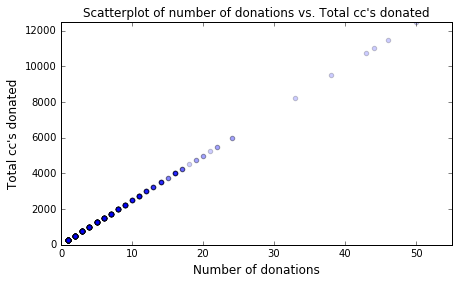

In [98]:
x = data.number_of_donations
y = data.total_ccs_donated

fig, ax = plt.subplots(figsize=(7,4))
ax.scatter(x, y, alpha=0.2)
ax.set_title("Scatterplot of number of donations vs. Total cc's donated", fontsize=12)

ax.set_xlim([0,max(x)+5])
ax.set_xlabel("Number of donations", fontsize=12)

ax.set_ylim([0,max(y)+5])
ax.set_ylabel("Total cc's donated", fontsize=12)

#### 5. Can you make a scatterplot?

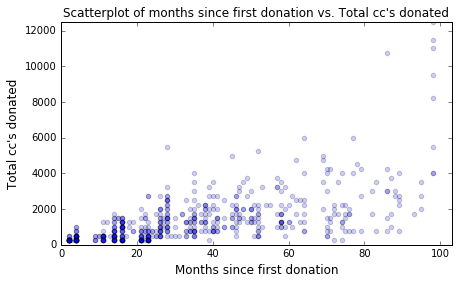

In [66]:
x = data.months_since_first_donation
y = data.total_ccs_donated

fig, ax = plt.subplots(figsize=(7,4))
ax.scatter(x, y, alpha=0.2)
ax.set_title("Scatterplot of months since first donation vs. Total cc's donated", fontsize=12)

ax.set_xlim([0,max(x)+5])
ax.set_xlabel("Months since first donation", fontsize=12)

ax.set_ylim([0,max(y)+5])
ax.set_ylabel("Total cc's donated", fontsize=12)

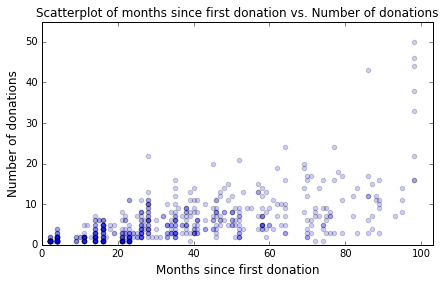

In [97]:
x = data.months_since_first_donation
y = data.number_of_donations

fig, ax = plt.subplots(figsize=(7,4))
ax.scatter(x, y, alpha=0.2)
ax.set_title("Scatterplot of months since first donation vs. Number of donations", fontsize=12)

ax.set_xlim([0,max(x)+5])
ax.set_xlabel("Months since first donation", fontsize=12)

ax.set_ylim([0,max(y)+5])
ax.set_ylabel("Number of donations", fontsize=12)

#### 6. Can you make a time-series plot?

Since the data does not include a full history of donations, a time-series plot cannot be created for it.

### 3) What are some insights gained from these plots?

The set is skewed towards a high number of low-volume donors, and the vast majority of donors have given in the last 24 months. Since donors who have only given once have total volumes of 250 cc's, it can be inferred that this is the standard donation unit.

### Do you see any correlations?

There is a positive correlation between months since first donation and total cc's donated. And a direct correlation (m = 15) of number of donations and total cc's donated.

### Is there a hypothesis you would like to investigate farther?

I would like to know what correlation, if any, there is between months since the first donation, and the total number of donations.

### What other questions does this lead you to ask?

What motivates donors to return?

### 4) Is there an interesting narrative that tells a compelling story? What other trends/relationships that will make this more complete?

Generally, there are a lot of new donors, plus a handful of people who consistently return to donate on a regular basis. It would be nice to know what the blood type breakdown was for each of these donors, as well as gender of donors and universities visited during the timeframe.